In [9]:
!pip3 install pandas_datareader --upgrade
!pip3 install tushare --upgrade
!pip3 install akshare --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade


     ------------------------------------ 973.4/973.4 kB 994.0 kB/s eta 0:00:00
     ---------------------------------------- 96.5/96.5 kB ? eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 6.7 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 58.7/58.7 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jsonpath: filename=jsonpath-0.82-py3-none-any.whl size=5625 sha256=1542bff74dd7231c254cd4b5b63a3fb40eed4b4f840a2a838af9ac00e7f6e0fd
  Stored in directory: c:\users\wikiglobal\appdata\local\pip\cache\wheels\8e\29\a8\1ad2ca6cc6b9da7a5d49b6b6406b604a6ab35030fca16e0435
Successfully built jsonpath
     --------------------------------------- 14.8/14.8 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    

ERROR: Could not install packages due to an OSError: [WinError 5] 拒绝访问。: 'C:\\Users\\WikiGlobal\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [23]:
import pandas_datareader as web
import tushare as ts
import akshare as ak
import pandas as pd
import numpy as np
web.__version__
ts.__version__

'1.2.89'

In [24]:
import pandas_datareader as web
import tushare as ts
import akshare as ak
import pandas as pd
import numpy as np

token = 'b1cd999ffdeaa7e89c60e31f04aa8ef44b6e1ef8511232b63257d460'
start_date = '2023-01-01'
end_date = '2023-04-30'

ts.set_token(token)
data = ts.pro_bar('600570.SH', start_date = start_date, end_date = end_date)
data['diff'] = data['close'].diff()
data['Signal'] = np.where(data['diff'] > 0, 1, 0)

data.head()


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,diff,Signal
0,600570.SH,20230428,46.60,49.62,46.60,49.40,45.99,3.41,7.4147,411862.09,1990577.323,NaN,0
1,600570.SH,20230427,45.11,46.38,44.55,45.99,45.60,0.39,0.8553,218267.81,1000869.489,-3.41,0
2,600570.SH,20230426,47.10,47.55,45.40,45.60,46.70,-1.10,-2.3555,234639.02,1083149.944,-0.39,0
3,600570.SH,20230425,47.25,48.18,46.27,46.70,47.44,-0.74,-1.5599,285751.74,1341427.336,1.10,1
4,600570.SH,20230424,48.88,49.30,46.90,47.44,49.16,-1.72,-3.4988,261106.38,1247994.860,0.74,1


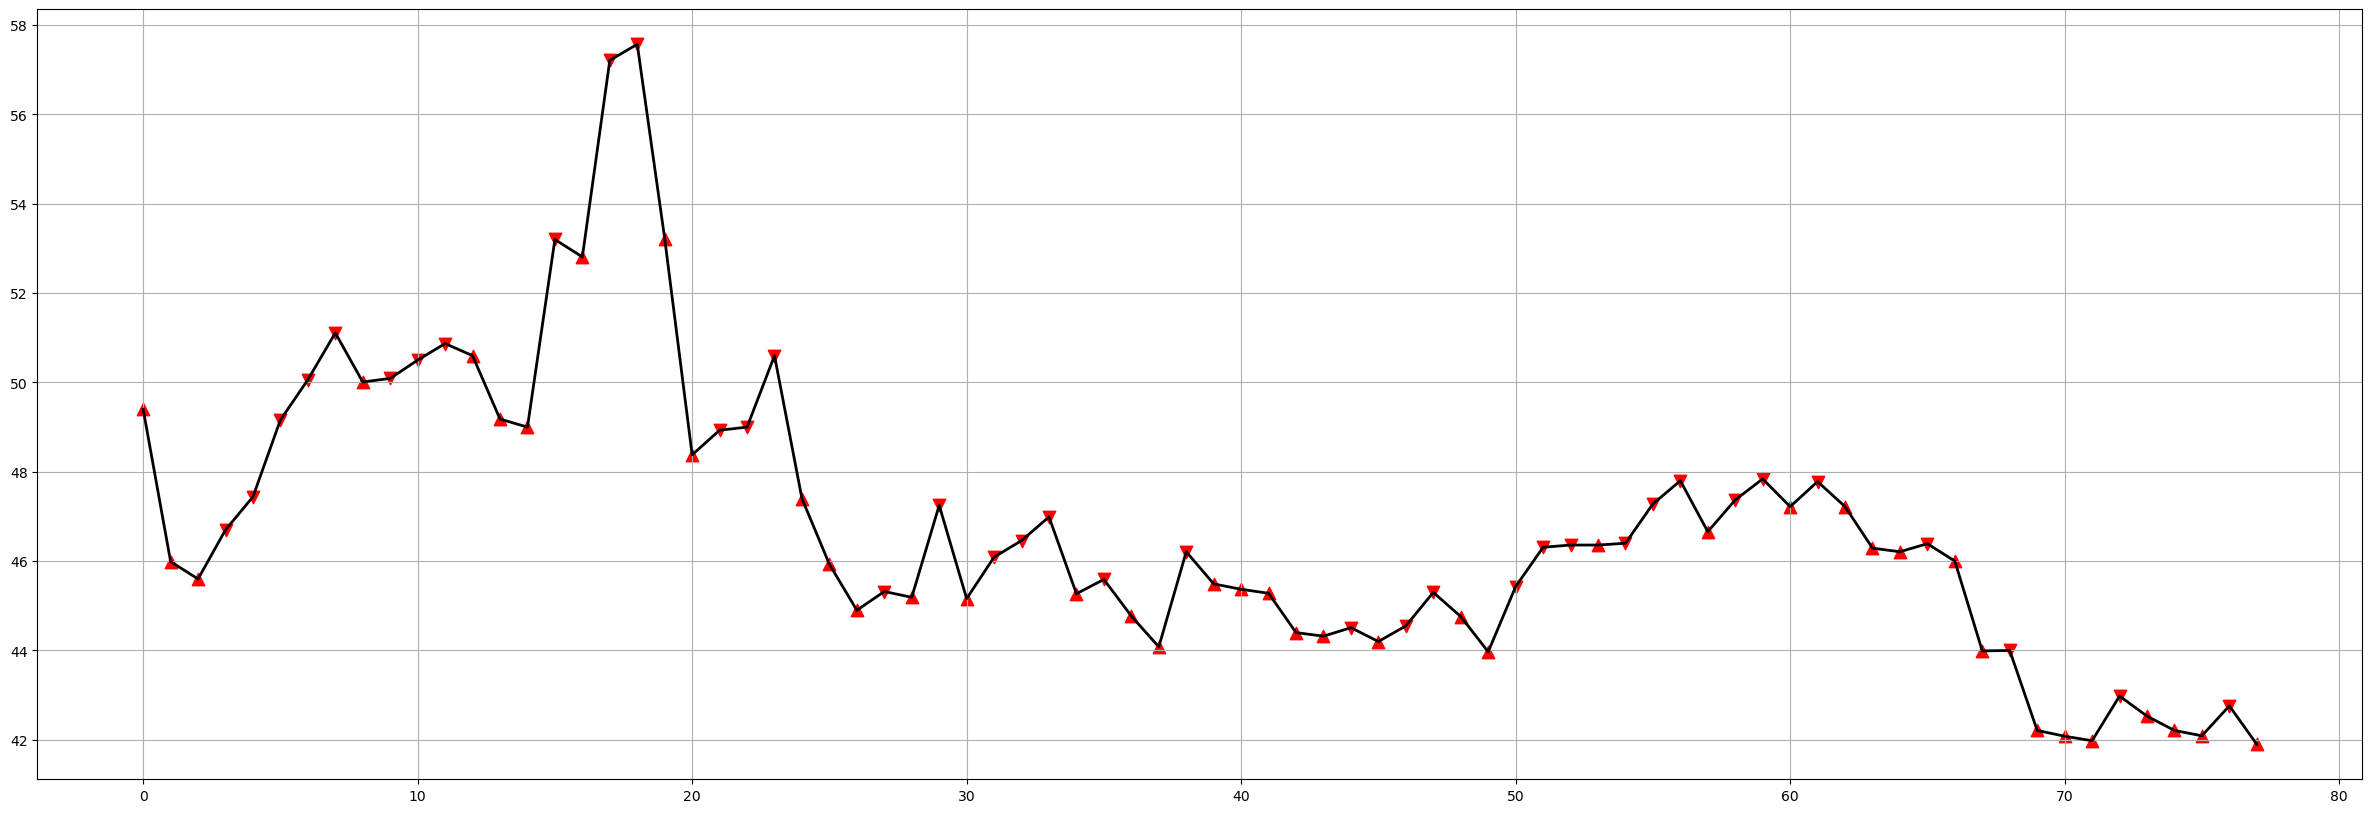

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,10))
data['close'].plot(linewidth = 2, color='k', grid = True)
plt.scatter(data['close'].loc[data.Signal ==1].index, data['close'][data.Signal ==1], marker='v', s=80, c='r')

plt.scatter(data['close'].loc[data.Signal == 0].index, data['close'][data.Signal == 0], marker='^', s=80, c='r')

plt.show()

In [28]:
from pandas_datareader import data as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

token = 'b1cd999ffdeaa7e89c60e31f04aa8ef44b6e1ef8511232b63257d460'
start_date = '2023-01-01'
end_date = '2023-04-30'

ts.set_token(token)
zgpa = ts.pro_bar('600570.SH', start_date = start_date, end_date = end_date)

zgpa.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600570.SH,20230428,46.60,49.62,46.60,49.40,45.99,3.41,7.4147,411862.09,1990577.323
1,600570.SH,20230427,45.11,46.38,44.55,45.99,45.60,0.39,0.8553,218267.81,1000869.489
2,600570.SH,20230426,47.10,47.55,45.40,45.60,46.70,-1.10,-2.3555,234639.02,1083149.944
3,600570.SH,20230425,47.25,48.18,46.27,46.70,47.44,-0.74,-1.5599,285751.74,1341427.336
4,600570.SH,20230424,48.88,49.30,46.90,47.44,49.16,-1.72,-3.4988,261106.38,1247994.860


In [42]:
!pip3 install futu-api --upgrade

In [29]:

zgpa_signal = pd.DataFrame(index = zgpa.index)
zgpa_signal['Price'] = zgpa['close']
zgpa_signal['Diff'] = zgpa_signal['Price'].diff()

zgpa_signal = zgpa_signal.fillna(0.0)

zgpa_signal['Signal'] = np.where(zgpa_signal['Diff'] >=0, 0,1)
zgpa_signal['Order'] = zgpa_signal['Signal'].diff() * 1000

zgpa_signal.head()



,Price,Diff,Signal,Order
0,49.40,0.00,0,NaN
1,45.99,-3.41,1,1000.0
2,45.60,-0.39,1,0.0
3,46.70,1.10,0,-1000.0
4,47.44,0.74,0,0.0


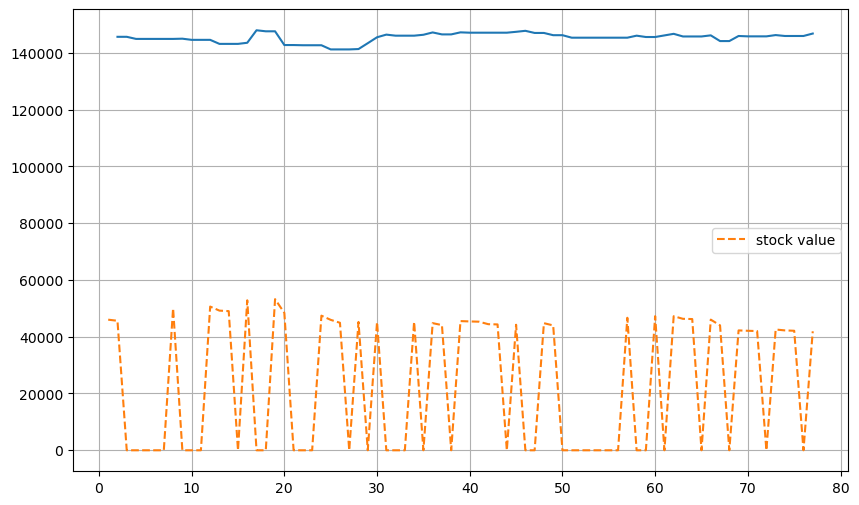

,Price,Diff,Signal,Order,stock,cash,total
0,49.40,0.00,0,NaN,NaN,NaN,NaN
1,45.99,-3.41,1,1000.0,45990.0,NaN,NaN
2,45.60,-0.39,1,0.0,0.0,145600.0,145600.0
3,46.70,1.10,0,-1000.0,-46700.0,192300.0,145600.0
4,47.44,0.74,0,0.0,0.0,144860.0,144860.0


In [30]:
initial_cash = 100000.00
zgpa_signal['stock'] = zgpa_signal['Order']*zgpa_signal['Price']

zgpa_signal['cash'] = initial_cash - (zgpa_signal['Order'].diff() * zgpa_signal['Price']).cumsum()

zgpa_signal['total'] = zgpa_signal['stock'] + zgpa_signal['cash']

plt.figure(figsize=(10,6))
plt.plot(zgpa_signal['total'])
plt.plot(zgpa_signal['Order'].cumsum() * zgpa_signal['Price'], '--', label='stock value')

plt.grid()
plt.legend(loc='center right')
plt.show()


zgpa_signal.head()

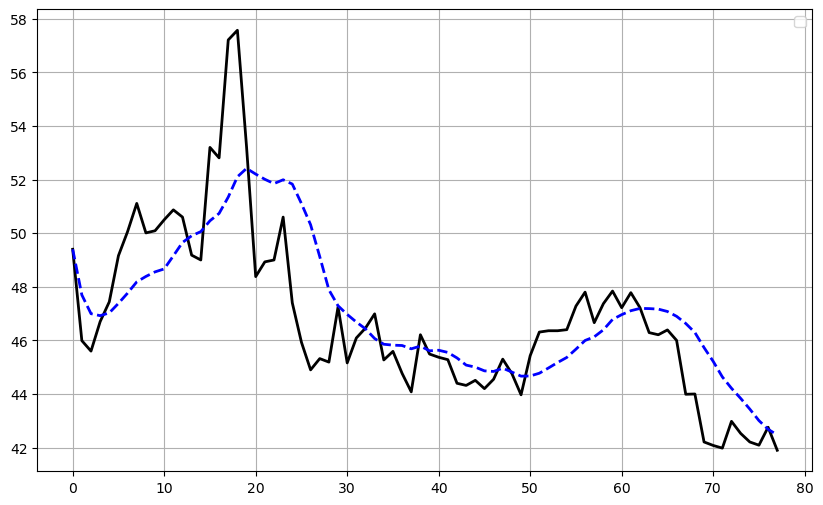

In [31]:
period = 10
avg_10 = []
avg_value = []

for price in zgpa_signal['Price']:
    avg_10.append(price)
    if len(avg_10) > period:
        del avg_10[0]
    avg_value.append(np.mean(avg_10))
zgpa_signal = zgpa_signal.assign(avg_10 = pd.Series(avg_value, index = zgpa_signal.index))

zgpa_signal.head()

plt.figure(figsize=(10,6))
plt.plot(zgpa_signal['Price'], lw=2, c='k')
plt.plot(zgpa_signal['avg_10'], '--',lw=2, c='b')

plt.legend()
plt.grid()
plt.show()

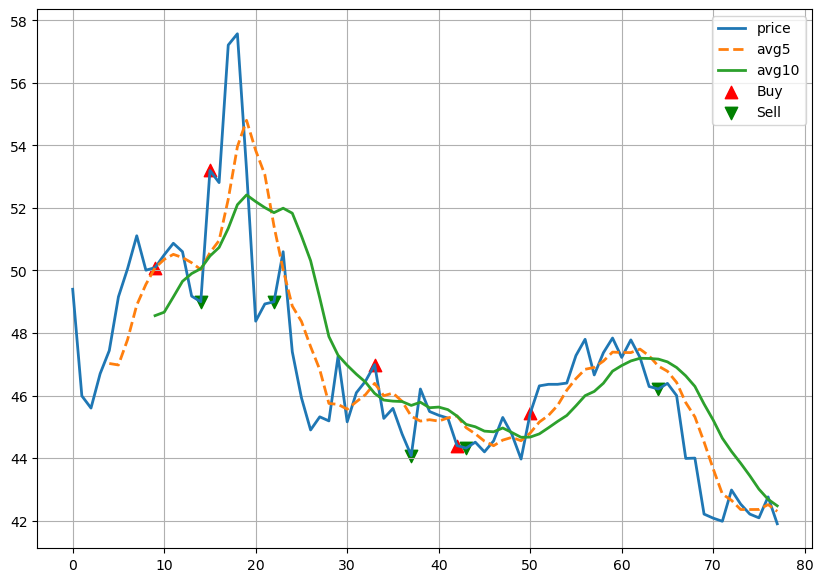

,signal,avg_5,avg_10,order
48,0,44.664,44.818,0.0
49,0,44.556,44.666,0.0
50,1,44.802,44.672,1.0
51,1,45.154,44.775,0.0
52,1,45.366,44.971,0.0
53,1,45.686,45.175,0.0
54,1,46.172,45.364,0.0
55,1,46.542,45.672,0.0
56,1,46.840,45.997,0.0
57,1,46.900,46.133,0.0


In [32]:
strategy = pd.DataFrame(index = zgpa_signal.index)
strategy['signal'] = 0
strategy['avg_5'] = zgpa_signal['Price'].rolling(5).mean()
strategy['avg_10'] = zgpa_signal['Price'].rolling(10).mean()
strategy['signal'] = np.where(strategy['avg_5'] > strategy['avg_10'], 1,0)

strategy['order'] = strategy['signal'].diff()


plt.figure(figsize=(10,7))
plt.plot(zgpa_signal['Price'], lw=2, label='price')
plt.plot(strategy['avg_5'], lw=2, ls='--', label='avg5')
plt.plot(strategy['avg_10'], lw=2, ls='-', label='avg10')

plt.scatter(strategy.loc[strategy.order == 1].index, zgpa_signal['Price'][strategy.order == 1], 
            marker='^', s=80, color='r', label='Buy')

plt.scatter(strategy.loc[strategy.order == -1].index, zgpa_signal['Price'][strategy.order == -1], 
            marker='v', s=80, color='g', label='Sell')

plt.legend()
plt.grid()
plt.show()

strategy.tail(30)

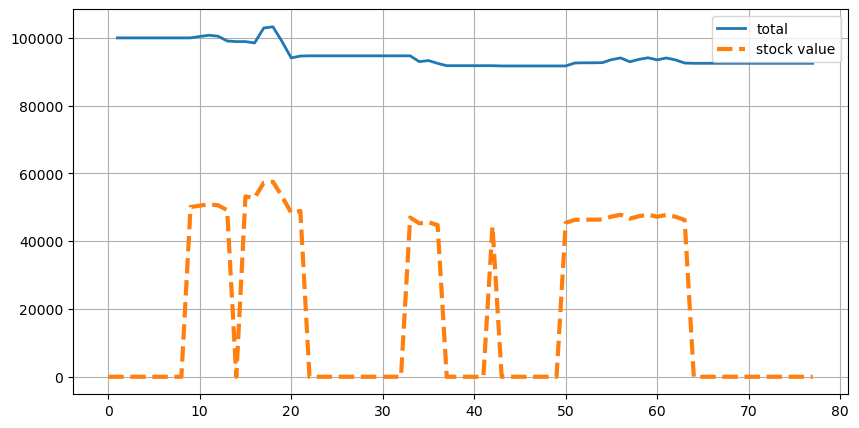

,trade_date,price,stock_value,cash,total
0,20230428,49.40,0.0,NaN,NaN
1,20230427,45.99,0.0,100000.0,100000.0
2,20230426,45.60,0.0,100000.0,100000.0
3,20230425,46.70,0.0,100000.0,100000.0
4,20230424,47.44,0.0,100000.0,100000.0


In [34]:
initial_cash = 100000

portfolio = pd.DataFrame(index = strategy.index)
positions = pd.DataFrame(index = strategy.index)
positions['stock'] = strategy['signal'] * 1000

portfolio['trade_date'] = zgpa['trade_date']
portfolio['price'] = zgpa['close']
portfolio['stock_value'] = positions.multiply(zgpa_signal['Price'], axis=0)
order = positions.diff()
portfolio['cash'] = initial_cash - order.multiply(zgpa_signal['Price'], axis=0).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['stock_value']

plt.figure(figsize=(10,5))
plt.plot(portfolio['total'], lw=2, label="total")
plt.plot(portfolio['stock_value'], lw=3, ls='--', label="stock value")

plt.legend()
plt.grid()
plt.show()


portfolio.tail(30)
portfolio.head()

In [35]:
turtle = pd.DataFrame(index = zgpa.index)

turtle['trade_date'] = zgpa['trade_date']
turtle['high'] = zgpa['close'].shift(1).rolling(5).max()
turtle['low'] = zgpa['close'].shift(1).rolling(5).min()
turtle['buy'] = zgpa['close'] > turtle['high']
turtle['sell'] = zgpa['close'] < turtle['low']

turtle.tail(30)


,trade_date,high,low,buy,sell
48,20230220,45.30,44.20,False,False
49,20230217,45.30,44.20,False,True
50,20230216,45.30,43.97,True,False
51,20230215,45.43,43.97,True,False
52,20230214,46.31,43.97,True,False
53,20230213,46.36,43.97,False,False
54,20230210,46.36,43.97,True,False
55,20230209,46.40,45.43,True,False
56,20230208,47.28,46.31,True,False
57,20230207,47.80,46.36,False,False


In [36]:
turtle['orders']= 0
position = 0
for k in range(len(turtle)):
    if turtle.buy[k] and position == 0:
        turtle.orders.values[k] = 1
        position = 1
    elif turtle.sell[k] and position >0:
        turtle.orders.values[k] = -1
        position = 0

turtle.tail(30)

,trade_date,high,low,buy,sell,orders
48,20230220,45.30,44.20,False,False,0
49,20230217,45.30,44.20,False,True,-1
50,20230216,45.30,43.97,True,False,1
51,20230215,45.43,43.97,True,False,0
52,20230214,46.31,43.97,True,False,0
53,20230213,46.36,43.97,False,False,0
54,20230210,46.36,43.97,True,False,0
55,20230209,46.40,45.43,True,False,0
56,20230208,47.28,46.31,True,False,0
57,20230207,47.80,46.36,False,False,0


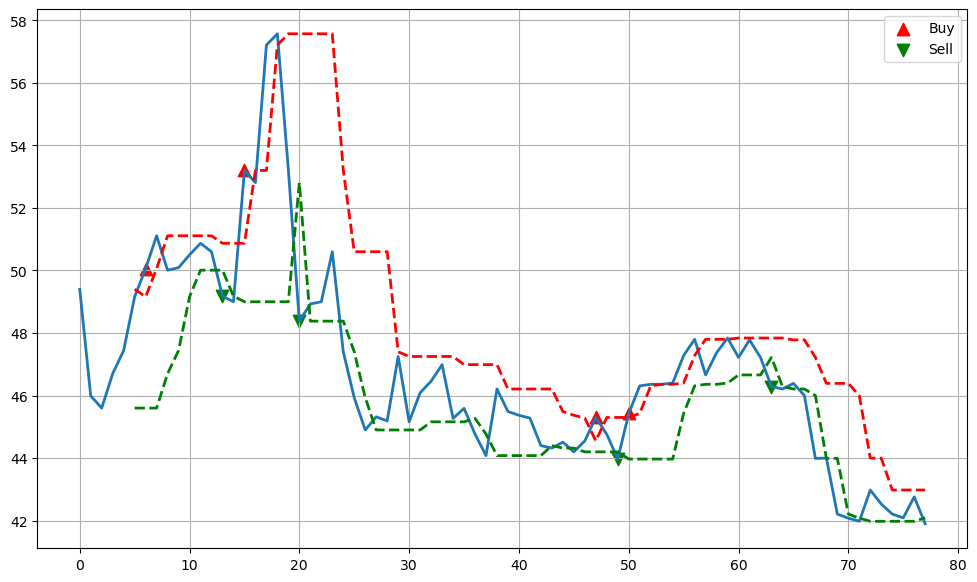

In [37]:
plt.figure(figsize = (12, 7))
plt.plot(zgpa['close'], lw=2)

plt.plot(turtle['high'], lw=2, ls='--', c='r')
plt.plot(turtle['low'], lw=2, ls='--', c='g')

plt.scatter(turtle.loc[turtle.orders==1].index, zgpa['close'][turtle.orders==1], 
            marker='^', s=80, color='r', label='Buy')

plt.scatter(turtle.loc[turtle.orders==-1].index, zgpa['close'][turtle.orders==-1], 
            marker='v', s=80, color='g', label='Sell')

plt.legend()
plt.grid()
plt.show()


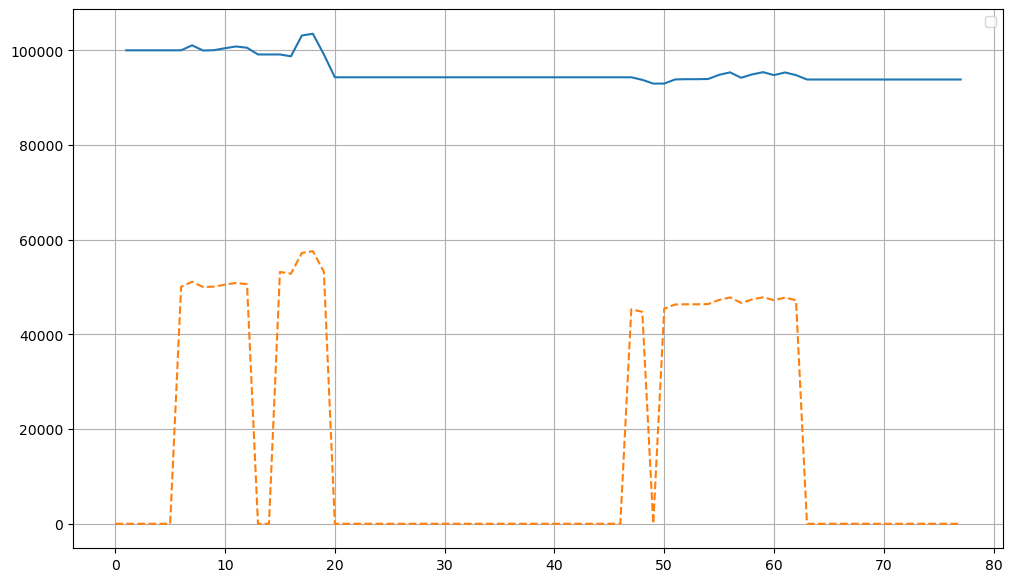

,stock,holding_values,cash,total
48,44760.0,44760.0,49000.0,93760.0
49,0.0,0.0,92970.0,92970.0
50,45430.0,45430.0,47540.0,92970.0
51,46310.0,46310.0,47540.0,93850.0
52,46360.0,46360.0,47540.0,93900.0
53,46360.0,46360.0,47540.0,93900.0
54,46400.0,46400.0,47540.0,93940.0
55,47280.0,47280.0,47540.0,94820.0
56,47800.0,47800.0,47540.0,95340.0
57,46660.0,46660.0,47540.0,94200.0


In [38]:
initial_cash = 100000

positions = pd.DataFrame(index = turtle.index).fillna(0.0)
positions['stock'] = 1000 * turtle['orders'].cumsum()

portfolio['date'] = zgpa['trade_date']

portfolio = positions.multiply(zgpa['close'], axis=0)
portfolio['holding_values'] = (positions.multiply(zgpa['close'], axis=0))

pos_diff = positions.diff()

portfolio['cash'] = initial_cash - (pos_diff.multiply(zgpa['close'], axis=0)).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holding_values']

plt.figure(figsize=(12, 7))
plt.plot(portfolio['total'])
plt.plot(portfolio['holding_values'], '--')


plt.grid()
plt.legend()
plt.show()

portfolio.tail(30)
